# Intro to Python and First law of Thermodynamics

In this tutorial we are going to go over some basic operations in Python that will guide you through the course and as an example we will use some of the thermodynamic concepts learned in class. 
This tutorial was heavily based on this [repo](https://sean-fitzpatrick.github.io/CalcLabs/IntrotoPython.html).  

In [1]:
# import numpy as matplotlib 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Thermodynamics recap

## First Law of Thermodynamics

The change in the internal energy (U) of a system is the sum of the heat (q) transferred to the system and the work (w) done on the system,
$$
dU = q + w
$$

## Heat
The energy that flows in between two objects that are at different temperatures. At constant pressure processes we can define heat as,
$$
dq_{p} = C_{P}dT,
$$
where $C_{P}$ is is the heat capacity of a substance at constant pressure, $C_{P} = mc_{p}$ where $m$ is the mass.

## P-V Work
Work in thermodynamics is defined as in classical mechanics, the energy transferred to a system by applying an external force along a displacement. 
In thermodynamics, one of the most common ways to do wok on a system is by changing the volume of the system through compression of expansion (P-V work).
P-V work is defined as,
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV
$$
where $P(T,V)$ is a function that describes the pressure of the system as a function of temperature (T) and its volume (V).
This type of integrals are known as **line integrals**. 



## Line integral
Let's compute the work done by a processes where the Pressure is given by,
$$
P(V) = \sin(V) + a V + b,
$$
where $a = -0.55$ and $b = 10.55$.

The initial and final volume for this processes are, $V_i = 10$ and $V_f=5$.


In [ ]:
# define the P function
# def f_P(v):
#     # code here
#     return p


# plot this process V vs P where the area under the curve is also coloured 
# tips, plt.fill_between() 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between

Text(0, 0.5, 'P')

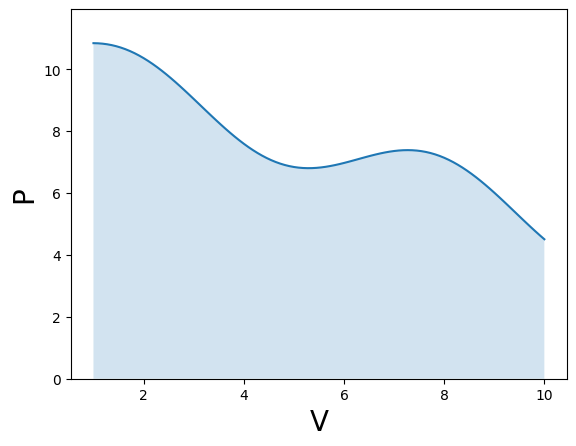

In [48]:
def f_P(V):
    a = -0.55
    b = 10.55
    p = np.sin(V) + a*V + b
    return p

vi = 1.
vf = 10

n = 100
v = np.linspace(vi, vf, n)
p = f_P(v)

# plotting
plt.plot(v, p)
plt.fill_between(v,p,alpha=0.2)
plt.ylim(0,np.max(p)+1.1)
plt.xlabel('V',fontsize=20)
plt.ylabel('P', fontsize=20)

What are the initial and final pressure? 

In [ ]:
# code here

Using numerical integration, compute the value of the work for this process.

In [30]:
# code here
# vi = # variable for initial volume
# vf = # variable for final volume
# n = # number of points for the integration grid
# dv = # width of the rectangles for integration


# print('Number of grid points ', n)
# print('Value of work, ', w)

In [49]:
vi = 1.
vf = 10
    
n = 100    
v = np.linspace(vi,vf, n)
dv = v[1] - v[0]
print(dv)

p = f_P(v)

w = 0
for vj in v[:-1]:
    vl = vj + dv/2
    pj = f_P(vj)
    aj = pj*(dv)
    w += aj

print(w)

                       

0.09090909090909083
69.39140063552806


Compute the true value of $P(T,V)$ for this process.
$$
w = -\int_{V_{i}}^{V_{f}} P(T,V) dV = -\int_{V_{i}}^{V_{f}} \left ( \sin(V) + a V + b \right ) dV 
$$
where $a = -0.55$ and $b = 10.55$.

<!-- w = -69.1044 -->

Using your code, how many grid points are required for numerical integration to approximate the true value  95%.
The formula for mean percentage error (MPE) for a single point is,
$$
MPE =  \left| \frac{y - \hat{y}}{y} \right|100\%,
$$
where $\hat{y}$ is the true or exact value and $y$ is the predicted one.


In [ ]:
# # create a function for the MPE
# def MPE(y, y_hat):
#     #code here
#     return value

In [36]:
# create a function for the MPE
def MPE(y,y_hat):
    e = (y - y_hat)/y_hat
    return np.abs(e) * 100